# 人脸识别之PCA实现
## 导入MyPCA及必要类库

In [1]:
from PCA import MyPCA
from preprocess import read_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 读取数据并划分数据集

In [2]:
path = 'Grp13Dataset/'
wide = 70
height = 80
images, labels = read_img(path, wide, height)
train_x, test_x, train_y, test_y = train_test_split(images, labels, test_size=0.3)

## 进行训练与预测
首先进行一个简单的使用,根据讲义要求,ratio默认取0.99

In [3]:
model = MyPCA()
model.train(train_x, train_y)
acc = model.predict(test_x, test_y)
print("n_components: " + str(model.n_components) +" accuracy:" + str(acc))

n_components: 229 accuracy:0.9186991869918699


对比模型预测的标签和真实标签,可以看出模型的精度较高

In [4]:
print("predicted_labels: ", model.predicted_labels)
print("true_labels: ", test_y)

predicted_labels:  [14 19 25  5 37 41 23  2 14 36 29  9  9  7 32  5 10  8 37  9 25  9 28  8
 22  2 40 14 33 13  6  3  9 26 12  8 23  7 13 21  6 27 18  8 38 18 15 21
  7 27  8 12 40  1 30  8 35 34 16 17 29 21 24  1 16 18  6 11  1 38  8  4
  3 30 26 31  4 37 26  9  9 22 27 30 30 34 23 37 14  1 17  8 26 15 38 23
 28 20 23 30 17 28 10 15 22 41 37 18 28  9 15 26 16 11 24  3 39  5  5  5
 41 35  1]
true_labels:  [14 19 25  5 37 41 23  2 14 36 29  9 31  7 32 40 10  8 28  9  3 17 28  8
 22  2 40 14 33 13  6 17  9 26 12  8 23  7 13 21  6 27 18  8 38 18 15 21
  7 27  8 12 40  1 30  8 35 34 16 17 29 21 24  1 16 18  6 11  1 38  8  4
  3 30 26 31 17 37 26 31  9 22 27 30 30 34 23 37 14  1 17  8 26 15 38 23
 28 20 23 30 17 28 10 15 22 41 37 18 28 31 15 26 16 11 24  3 39  5 40  5
 41 35  1]


## 循环测试作图

n_components: 1 ratio: 0.0 accuracy:0.18699186991869918
n_components: 1 ratio: 0.1 accuracy:0.18699186991869918
n_components: 1 ratio: 0.2 accuracy:0.18699186991869918
n_components: 2 ratio: 0.3 accuracy:0.3821138211382114
n_components: 3 ratio: 0.4 accuracy:0.5528455284552846
n_components: 5 ratio: 0.5 accuracy:0.6422764227642277
n_components: 9 ratio: 0.6 accuracy:0.7723577235772358
n_components: 17 ratio: 0.7 accuracy:0.8373983739837398
n_components: 34 ratio: 0.8 accuracy:0.8943089430894309
n_components: 35 ratio: 0.805 accuracy:0.9024390243902439
n_components: 37 ratio: 0.81 accuracy:0.9105691056910569
n_components: 38 ratio: 0.815 accuracy:0.9024390243902439
n_components: 40 ratio: 0.82 accuracy:0.9105691056910569
n_components: 41 ratio: 0.825 accuracy:0.9105691056910569
n_components: 43 ratio: 0.83 accuracy:0.9186991869918699
n_components: 45 ratio: 0.835 accuracy:0.9186991869918699
n_components: 46 ratio: 0.84 accuracy:0.9105691056910569
n_components: 48 ratio: 0.845 accuracy:0

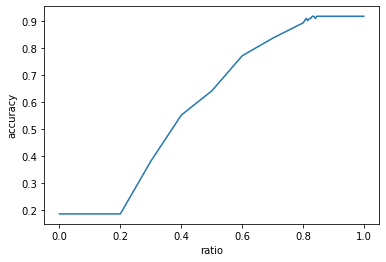

In [5]:
x, y = [], []

for i in range(0, 80, 10):
    model = MyPCA(ratio=i/100)
    model.train(train_x, train_y)
    acc = model.predict(test_x, test_y)
    x.append(i/100)
    y.append(acc)
    print("n_components: " + str(model.n_components) +
          " ratio: " + str(i/100) +
          " accuracy:" + str(acc))

for i in range(800, 990, 5):
    model = MyPCA(ratio=i/1000)
    model.train(train_x, train_y)
    acc = model.predict(test_x, test_y)
    x.append(i/1000)
    y.append(acc)
    print("n_components: " + str(model.n_components) +
          " ratio: " + str(i/1000) +
          " accuracy:" + str(acc))

for i in range(9900, 10000, 10):
    model = MyPCA(ratio=i/10000)
    model.train(train_x, train_y)
    acc = model.predict(test_x, test_y)
    x.append(i/10000)
    y.append(acc)
    print("n_components: " + str(model.n_components) +
          " ratio: " + str(i/10000) +
          " accuracy:" + str(acc))

plt.xlabel('ratio')
plt.ylabel('accuracy')
plt.plot(x, y)
plt.show()

观察图像,不难发现在 $ratio=0.81$ 时,模型的精度已经达到了较高的水平,此时特征数为 37 个,PCA 有效地降低了数据的维度